<a href="https://colab.research.google.com/github/wespitia9/Principales-Algoritmos-implementados-en-el-uso-de-Machine-Learning/blob/main/Algoritmos_de_Regresi%C3%B3n_L%C3%ADneal_y_Regresi%C3%B3n_Log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de Regresión

Los algoritmos de regresión son un conjunto de técnicas de `Aprendizaje Automático` supervisado que se utilizan para predecir valores numéricos a partir de un conjunto de variables independientes. La regresión se utiliza para establecer la relación entre una variable dependiente (también llamada variable de respuesta) y una o más variables independientes (también conocidas como variables predictoras o explicativas).

Los algoritmos de regresión intentan encontrar la mejor función que describa la relación entre las variables independientes y la variable dependiente. Esta función puede ser una línea recta (en el caso de la regresión lineal) o una curva más compleja (en el caso de la regresión no lineal). Una vez que se ha ajustado el modelo de regresión, se puede utilizar para predecir el valor de la variable dependiente para nuevos valores de las variables independientes.

Los algoritmos de Regresión modelan la relación entre distintas variables (features) utilizando una medida de error que se intentará minimizar en un proceso iterativo para poder realizar predicciones “lo más acertadas posible”. Se utilizan mucho en el análisis estadístico. El ejemplo clásico es la predicción de precios de Inmuebles a partir de sus características: cantidad de ambientes del piso, barrio, distancia al centro, metros cuadrados del piso, etc.

Los Algoritmos más usados de Regresión son:

*   Regresión Lineal 
*   Regresión Logística

La Regresión Lineal y la Regresión Logística son dos técnicas de `Aprendizaje Automático` supervisado utilizadas en problemas de modelado predictivo.

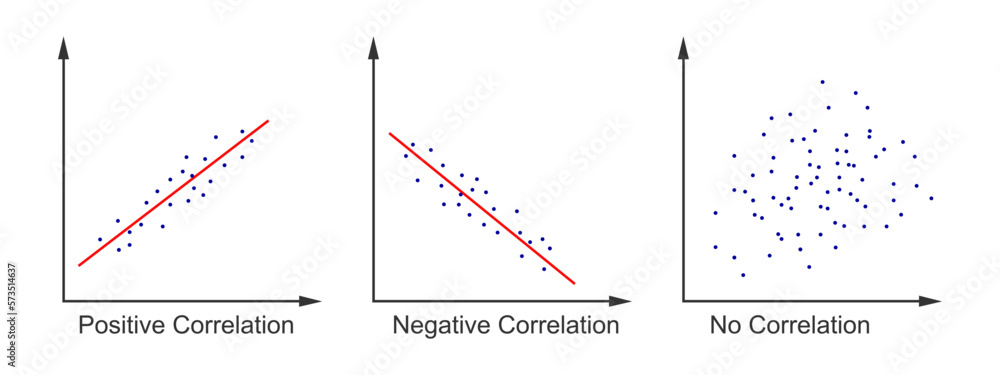

Los `algoritmos de Regresión`, tanto `Logístico` como `Lineal`, son técnicas que permiten la clasificación o predicción de valores en función de variables independientes. Estos algoritmos trabajan iterativamente para encontrar el modelo que mejor se ajuste a los `datos`, minimizando el error entre los valores predichos y los valores reales.

En la `Regresión Lineal`, se busca establecer una relación lineal entre las variables, lo que permite predecir valores numéricos. Mientras que en la `Regresión Logística`, se utiliza una función logística para predecir valores binarios.

Recordemos que en ambos casos, el objetivo es encontrar el modelo que minimice el error, y que permita obtener la mejor respuesta posible. Estas técnicas son ampliamente utilizadas en el análisis estadístico y en el aprendizaje automático, y tienen aplicaciones en una gran variedad de campos, como la medicina, la economía, la industria, entre otros.

## Regresión Lineal

La Regresión Lineal es una técnica que se utiliza para establecer una relación lineal entre una variable dependiente (también conocida como variable de respuesta) y una o más variables independientes (también conocidas como variables predictoras o explicativas). Esta técnica asume que existe una relación lineal entre las variables independientes y la variable dependiente, lo que significa que la relación puede ser representada por una línea recta. La Regresión Lineal se utiliza para predecir valores numéricos, como el precio de una casa en función de su tamaño, ubicación y otras características.

En estadísticas, regresión lineal es una aproximación para modelar la relación entre una variable escalar dependiente “y” y una o mas variables explicativas nombradas con “X”.

**¿Cómo funciona el algoritmo de `regresión lineal` en `Machine Learning`?**

En los algoritmos de `Machine Learning` Supervisados, el proceso de aprendizaje consiste en encontrar la relación entre las variables de entrada y la variable de salida, para poder predecir valores futuros. En el caso de la `Regresión Lineal`, el algoritmo busca automáticamente la "recta" que mejor se ajusta a los `datos` y permite hacer predicciones.

Para encontrar la recta óptima, el algoritmo mide el error entre los valores de entrada y el valor de salida real, y trata de minimizar este error utilizando una función de [error cuadrático](https://es.wikipedia.org/wiki/Error_cuadr%C3%A1tico_medio). Existen diversos métodos para lograr este objetivo, pero uno de los más comunes es utilizar la [ecuación normal](https://en.wikipedia.org/wiki/Linear_least_squares#Derivation_of_the_normal_equations), que nos permite obtener un resultado directo mediante una versión vectorial.

En resumen, los algoritmos de `Machine Learning` Supervisados, como la Regresión Lineal, utilizan técnicas matemáticas para encontrar patrones en los `datos` y establecer relaciones entre las variables de entrada y la variable de salida, permitiendo hacer predicciones precisas.

**Ejercicio técnico:**

En este ejemplo cargaremos un CSV de entrada obtenido por webscraping que contiene diversas URLs a artículos sobre Machine Learning de algunos sitios muy importantes como Techcrunch o KDnuggets y como características de entrada -las columnas- tendremos:

* Title: Titulo del Artículo
* url: ruta al artículo
* Word count: la cantidad de palabras del artículo,
* of Links: los enlaces externos que contiene,
* of comments: cantidad de comentarios,
* Images video: suma de imágenes (o videos),
* Elapsed days: la cantidad de días transcurridos (al momento de crear el archivo)
* Shares: nuestra columna de salida que será la “cantidad de veces que se compartió el artículo”.

A partir de las características de un artículo de machine learning intentaremos predecir, cuantas veces será compartido en Redes Sociales.

### Regresión lineal simple en Python (con 1 variable)

In [14]:
# Preparación y configuración del entorno de trabajo, instalar y/o importar librerias necesarias

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
# Leemos el archivo csv y lo cargamos como un dataset de Pandas. Y vemos su tamaño

data = pd.read_csv("./articulos_ml.csv")
data.shape

(161, 8)

In [ ]:
data.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


Hay algunos campo NaN (nulos) que hacen referencia a las URL de acceso o comentarios

In [17]:
# Estadísticas basica del dataframe
data.describe() 

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


En este análisis, se observa que la longitud media de los artículos es de 1808 palabras, siendo el artículo más corto de 250 palabras y el más extenso de 8401. A continuación, utilizaremos una regresión lineal para investigar si existe una correlación entre la longitud del artículo y la cantidad de veces que éste ha sido compartido (Shares).

<ipython-input-18-209fc48d0ebf>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data.drop(['Title','url', 'Elapsed days'],1).hist(color='blue', edgecolor='white')


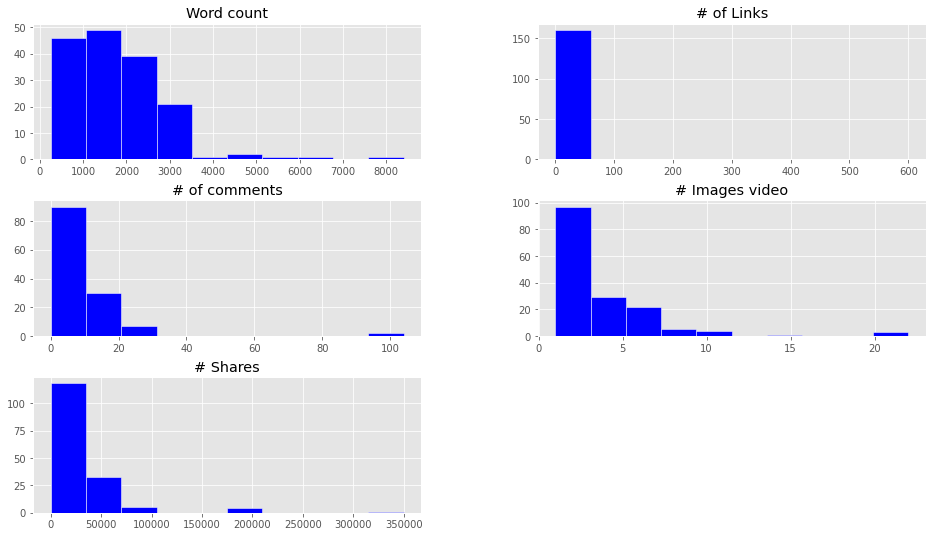

In [18]:
# Con visualización, obtenemos una mejor visión general de los datos de entrada:
# Este código se utiliza para crear un histograma de un conjunto de datos y visualizarlo en una gráfica utilizando la biblioteca Matplotlib de Python.

data.drop(['Title','url', 'Elapsed days'],1).hist(color='blue', edgecolor='white')
plt.show()

Aquí podemos observar la mayor cantidad de concentración a nivel de registros.

En primer lugar, vamos a filtrar los datos de cantidad de palabras para quedarnos únicamente con aquellos registros que tengan menos de 3500 palabras y cuya cantidad de compartidos sea menor a 80.000. Después, para facilitar la visualización de los datos, asignaremos a los puntos con menos de 1808 palabras (que corresponde a la media) un color azul, mientras que los puntos con más palabras se representarán en naranja.

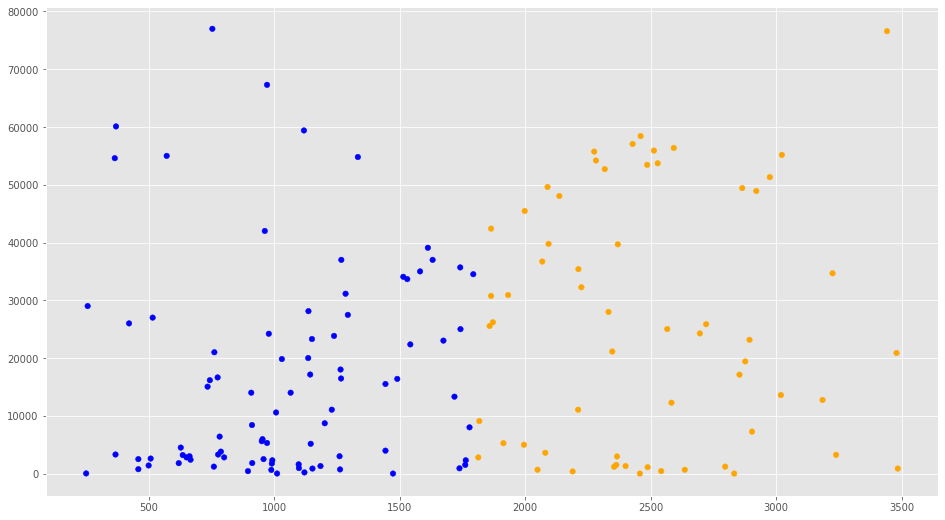

In [19]:
filtered_data = data[(data['Word count'] <= 3500) & (data['# Shares'] <= 80000)]
 
colores=['orange','blue']
tamanios=[30,60]
 
f1 = filtered_data['Word count'].values
f2 = filtered_data['# Shares'].values
 
# Vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras
asignar=[]
for index, row in filtered_data.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

### Regresión Lineal con Python y SKLearn

En primer lugar, vamos a crear nuestros datos de entrada utilizando únicamente el conteo de palabras, mientras que las etiquetas serán los # Shares. A continuación, crearemos un objeto de regresión lineal utilizando LinearRegression() y lo entrenaremos con nuestros datos de entrada utilizando el método fit(). Finalmente, imprimiremos los coeficientes y los puntajes obtenidos en el proceso de entrenamiento.

In [ ]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =filtered_data[["Word count"]]
X_train = np.array(dataX)
y_train = filtered_data['# Shares'].values
 
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(X_train, y_train)
 
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)
 
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [5.69765366]
Independent term: 
 11200.30322307416
Mean squared error: 372888728.34
Variance score: 0.06


De la ecuación de la recta y = mX + b, nuestro coeficiente de pendiente "m" es 5.69 y el término independiente "b" es 11200. Sin embargo, nuestro error cuadrático medio es bastante alto, lo que indica que este modelo no es muy preciso. No obstante, lo importante es que estamos aprendiendo a utilizar este modelo. El puntaje de varianza también refleja esta falta de precisión, ya que debería estar cerca de 1.0 para indicar un buen ajuste del modelo a los datos.

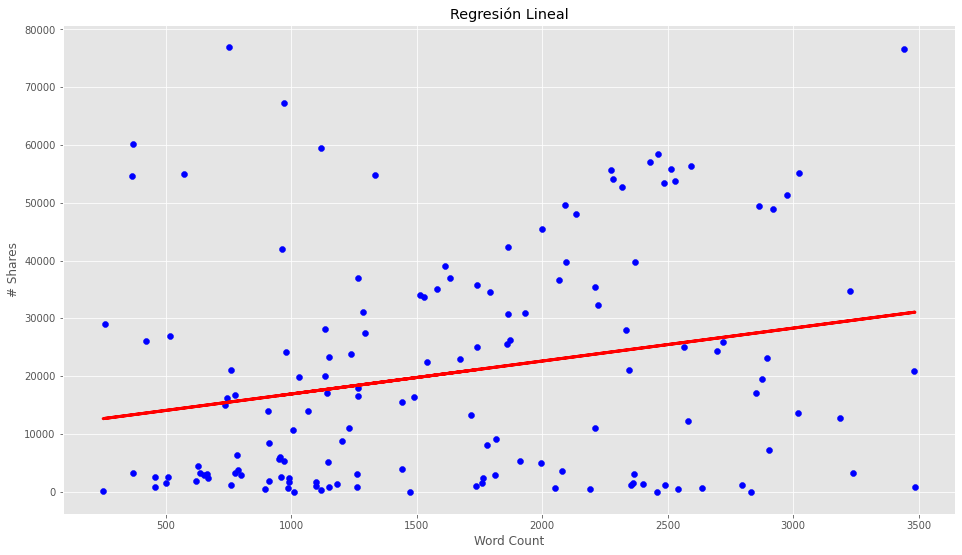

In [ ]:
# Veamos la visualización de la recta


# Graficamos los puntos de entrenamiento
plt.scatter(X_train, y_train, color='blue')
 
# Graficamos la línea predicha por el modelo
plt.plot(X_train, y_pred, color='red', linewidth=3)
 
# Agregamos etiquetas y título al gráfico
plt.xlabel("Word Count")
plt.ylabel("# Shares")
plt.title("Regresión Lineal")
 
# Mostramos el gráfico
plt.show()

### Predicción en regresión lineal simple

Vamos a intentar probar nuestro algoritmo, suponiendo que quisiéramos predecir cuántos “compartir” obtendrá un articulo sobre ML de 2000 palabras

In [20]:

#Vamos a comprobar:
# Quiero predecir cuántos "Shares" voy a obtener por un artículo con 2.000 palabras,
# según nuestro modelo, hacemos:

y_Dosmil = regr.predict([[2000]])
print(int(y_Dosmil))

22595


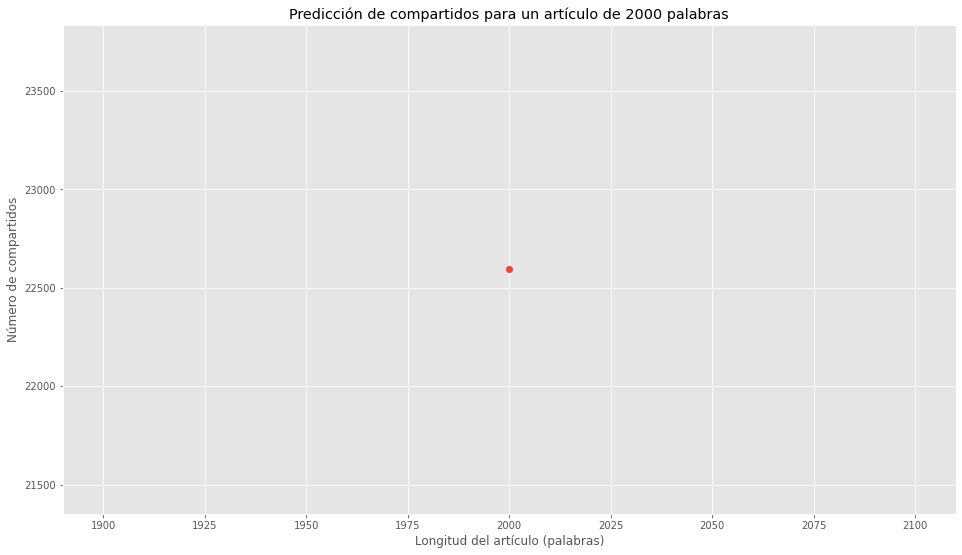

In [23]:
# Generar datos de ejemplo para el gráfico
x = [2000] # longitud del artículo en palabras
y_pred = [int(y_Dosmil)] # predicción del modelo para el número de compartidos

# Crear el gráfico de línea
plt.plot(x, y_pred, '-o')

# Etiquetas de los ejes
plt.xlabel('Longitud del artículo (palabras)')
plt.ylabel('Número de compartidos')

# Título del gráfico
plt.title('Predicción de compartidos para un artículo de 2000 palabras')

# Mostrar el gráfico
plt.show()

La predicción devuelta para un artículo de 2000 palabras es de 22595 "Shares" (Quizá es muy ficticia esta predicción).

Regresión Lineal Múltiple o Regresión con Múltiples Variables en Python

En este ejercicio, vamos a ampliar el modelo utilizando más de una variable de entrada. Esto permite una mayor capacidad algoritmo de Machine Learning, lo que nos permitirá obtener predicciones más precisas y complejas.

En este caso, utilizaremos dos "variables predictoras" para representar gráficamente los datos en tres dimensiones. Sin embargo, es importante recordar que, para obtener predicciones más precisas, se pueden utilizar más de dos variables y no es necesario representarlas gráficamente.

La primera variable seguirá siendo la cantidad de palabras, mientras que la segunda variable será la suma de tres columnas de entrada: la cantidad de enlaces, comentarios y cantidad de imágenes. 

In [24]:
# Vamos a intentar mejorar el Modelo, con una dimensión más: 

# Para poder graficar en 3D, haremos una variable nueva que será la suma de los enlaces, comentarios e imágenes

suma = (filtered_data["# of Links"] + filtered_data['# of comments'].fillna(0) + filtered_data['# Images video'])
 
dataX2 =  pd.DataFrame()
dataX2["Word count"] = filtered_data["Word count"]
dataX2["suma"] = suma
XY_train = np.array(dataX2)
z_train = filtered_data['# Shares'].values

Ahora que tenemos nuestras dos variables de entrada en XY_train, la variable de salida pasa de ser "Y" a ser el eje "Z".

Crearemos un nuevo objeto de Regresión Lineal utilizando la biblioteca SKLearn, pero esta vez utilizaremos ambas dimensiones que se encuentran en XY_train. Como antes, imprimiremos los coeficientes y puntuaciones obtenidos por el modelo:

In [32]:
# Creamos un nuevo objeto de Regresión Lineal
regr2 = linear_model.LinearRegression()
 
# Entrenamos el modelo, esta vez, con 2 dimensiones
# obtendremos 2 coeficientes, para graficar un plano
regr2.fit(XY_train, z_train)
 
# Hacemos la predicción con la que tendremos puntos sobre el plano hallado
z_pred = regr2.predict(XY_train)
 
# Los coeficientes
print('Coefficients: \n', regr2.coef_)
# Error cuadrático medio
print("Mean squared error: %.2f" % mean_squared_error(z_train, z_pred))
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score: %.2f' % r2_score(z_train, z_pred))

Coefficients: 
 [   6.63216324 -483.40753769]
Mean squared error: 352122816.48
Variance score: 0.11


Como podemos observar, ahora obtenemos dos coeficientes, cada uno correspondiente a nuestras dos variables predictoras. En lugar de graficar una línea, representaremos un plano en 3 dimensiones.

El error obtenido sigue siendo significativo, aunque ha mejorado respecto al resultado anterior. Además, el puntaje de varianza ha mejorado aproximadamente el doble en comparación con el anterior (aunque todavía está muy lejos del valor óptimo de 1).

In [33]:
fig = plt.figure()
ax = Axes3D(fig)

# Creamos una malla, sobre la cual graficaremos el plano
xx, yy = np.meshgrid(np.linspace(0, 3500, num=10), np.linspace(0, 60, num=10))

# calculamos los valores del plano para los puntos x e y
nuevoX = (regr2.coef_[0] * xx)
nuevoY = (regr2.coef_[1] * yy) 

# calculamos los correspondientes valores para z. Debemos sumar el punto de intercepción
z = (nuevoX + nuevoY + regr2.intercept_)

# Graficamos el plano
ax.plot_surface(xx, yy, z, alpha=0.2, cmap='hot')

# Graficamos en azul los puntos en 3D
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_train, c='blue',s=30)

# Graficamos en rojo, los puntos que 
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_pred, c='red',s=40)

# con esto situamos la "camara" con la que visualizamos
ax.view_init(elev=30., azim=65)
        
ax.set_xlabel('Cantidad de Palabras')
ax.set_ylabel('Cantidad de Enlaces,Comentarios e Imagenes')
ax.set_zlabel('Compartido en Redes')
ax.set_title('Regresión Lineal con Múltiples Variables')

Text(0.5, 0.92, 'Regresión Lineal con Múltiples Variables')

<Figure size 1152x648 with 0 Axes>

### Predicción con el modelo de Mútiples Variables

Veamos ahora, que predicción tendremos para un artículo de 2000 palabras, con 10 enlaces, 4 comentarios y 6 imágenes.

In [36]:
# Si quiero predecir cuántos "Shares" voy a obtener por un artículo con: 
# 2000 palabras y con enlaces: 10, comentarios: 4, imagenes: 6
# según nuestro modelo, hacemos:
 
z_Dosmil = regr2.predict([[2000, 10+4+6]])
print(int(z_Dosmil))

20518


### Conclusion y Mejora de nuestro modelo

En este ejercicio hemos aprendido a crear modelos de Regresión Lineal con SKLearn en Python, tanto con una como con múltiples variables de entrada. Sin embargo, al aplicar el modelo a nuestro conjunto de datos, notamos que las predicciones obtenidas no son muy precisas. Por ejemplo, al utilizar nuestro primer modelo para predecir el número de "Shares" que tendría un artículo de 2000 palabras, obtenemos un valor de 22595, pero el margen de error es de más o menos 19310, lo que indica que el número real de "Shares" podría estar entre 3285 y 41905.

Es importante tener en cuenta que para mejorar la precisión de nuestro modelo, necesitamos encontrar mejores datos de entrada y utilizar más dimensiones. Sin embargo, también debemos considerar la posibilidad de que no exista una relación clara entre las variables de entrada y el éxito en "Shares" del artículo, por lo que nunca podremos predecir con certeza esta salida. En cualquier caso, seguir explorando y mejorando nuestros modelos nos permitirá obtener mejores predicciones en el futuro.